In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import calendar

df = pd.read_csv('df_sex_unemployment_rates.csv')
df['year'] = pd.DatetimeIndex(df.date).year
df['month'] = pd.DatetimeIndex(df.date).month
df_date = df.set_index('date')
df_date.head()

c:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,overall_rate,men_rate,women_rate,men_16_17_rate,women_16_17_rate,men_16_19_rate,women_16_19_rate,men_18_19_rate,women_18_19_rate,men_16_24_rate,...,men_25_54_rate,women_25_54_rate,men_35_44_rate,women_35_44_rate,men_45_54_rate,women_45_54_rate,men_55plus_rate,women_55plus_rate,year,month
date,,,,,,,,,,,,,,,,,,,,,
1948-01-01,3.4,3.4,3.3,9.7,8.8,9.4,7.2,9.5,6.8,8.0,...,2.3,2.8,2.1,1.8,2.3,2.1,3.0,NaN,1948,1
1948-02-01,3.8,3.6,4.5,13.0,13.2,10.8,8.9,9.2,6.8,8.6,...,2.6,3.7,2.5,2.6,2.6,3.3,2.9,NaN,1948,2
1948-03-01,4.0,3.8,4.4,14.0,11.4,11.9,8.6,10.3,7.3,10.0,...,2.6,3.3,2.6,3.0,2.4,3.3,2.8,NaN,1948,3
1948-04-01,3.9,3.8,4.3,11.6,10.6,9.8,9.2,8.6,8.6,8.6,...,2.8,3.5,2.7,3.5,2.5,3.1,2.9,NaN,1948,4
1948-05-01,3.5,3.5,3.7,7.1,5.4,7.6,6.1,8.6,7.0,7.6,...,2.5,3.1,2.4,3.0,2.3,2.9,3.1,NaN,1948,5


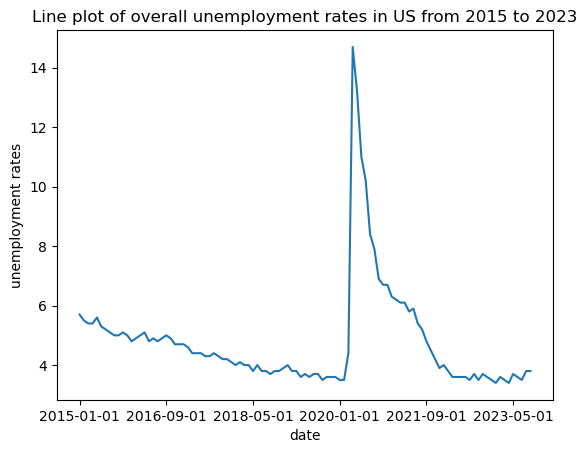

In [2]:
df_date['overall_rate'].loc['2015':].plot()
plt.title("Line plot of overall unemployment rates in US from 2015 to 2023")
plt.xlabel("date")
plt.ylabel("unemployment rates")
plt.show()


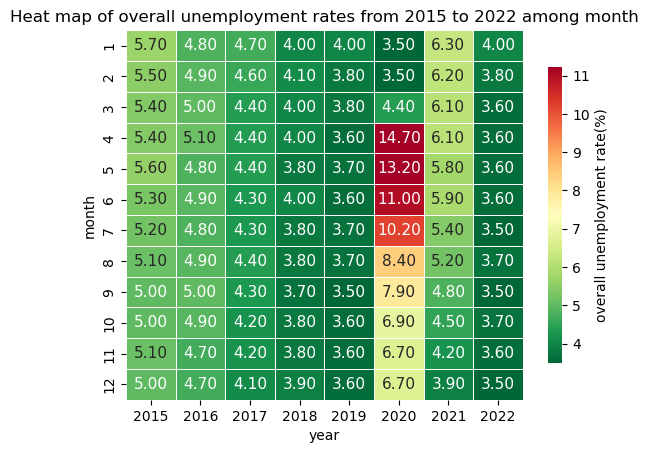

In [3]:
all_month_year_sum_df = pd.pivot_table(df_date.loc['2015':'2023'], values="overall_rate",index=["month"], columns=["year"], aggfunc=np.sum, fill_value=0)

sns.heatmap(all_month_year_sum_df, cmap='RdYlGn_r',
                     robust=True,
                     fmt='.2f', annot=True,
                     linewidths=.5, annot_kws={'size':11},
                     cbar_kws={'shrink':.8, 'label':'overall unemployment rate(%)'})
plt.title("Heat map of overall unemployment rates from 2015 to 2022 among month")
plt.show()

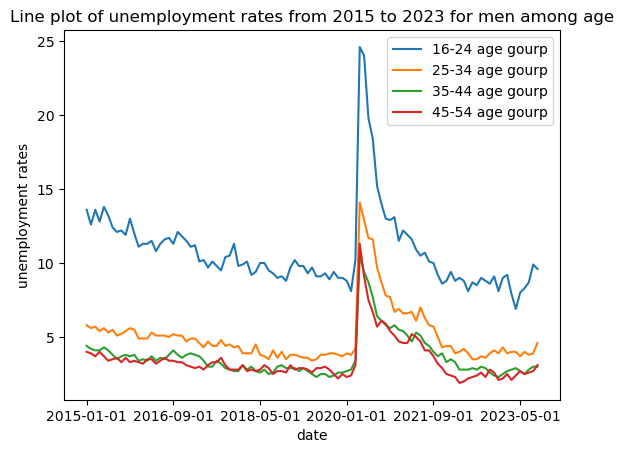

In [8]:
df_date[['men_16_24_rate',
 'men_25_34_rate',
 'men_35_44_rate',
 'men_45_54_rate']].loc['2015':].plot()
plt.title("Line plot of unemployment rates from 2015 to 2023 for men among age")
plt.legend(labels=['16-24 age gourp','25-34 age gourp','35-44 age gourp','45-54 age gourp'])
plt.xlabel("date")
plt.ylabel("unemployment rates")
plt.show()

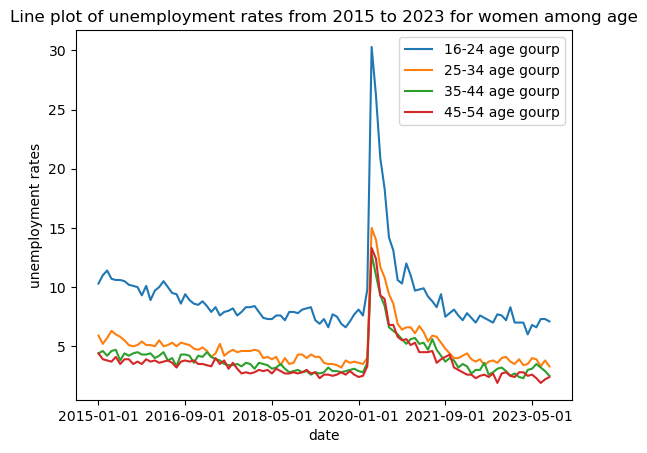

In [7]:
df_date[['women_16_24_rate',
 'women_25_34_rate',
 'women_35_44_rate',
 'women_45_54_rate']].loc['2015':].plot()
plt.title("Line plot of unemployment rates from 2015 to 2023 for women among age")
plt.legend(labels=['16-24 age gourp','25-34 age gourp','35-44 age gourp','45-54 age gourp'])
plt.xlabel("date")
plt.ylabel("unemployment rates")
plt.show()